# **Capstone Project on Predicting Credit Card Approvals**

## **Introduction**
Credit cards are one of the most commonly used financial tools. However, obtaining a credit card can be a difficult task for many individuals due to various factors such as income level, and employment status. To help the application process and improve the approval rate, machine learning models can be used to predict credit card approval. In this project, we will explore how various factors affect credit card approval rates and use predictive models to improve the accuracy of credit card approval predictions.

### **Attribute Descriptions**
Gender: This column indicates the gender of the individual, either male or female. It is a Categorical (binary).

Car_Owner: This column indicates whether the individual owns a car or not, either Yes or No.It is a Categorical (binary).

Propert_Owner: This column indicates whether the individual owns a property or not, either Yes or No.It is a Categorical (binary).

Children: This column indicates the number of children the individual has.It is a Numerical(integer).

Annual_income: This column contains the annual income of the individual.It is a Numerical (continuous).

Type_Income: This column indicates the type of income the individual earns, such as salary or self-employed income.It is a Numerical (nominal).

Education: This column indicates the level of education of the individual. It is a Categorical (ordinal).

Marital_status: This column indicates the marital status of the individual, such as Single, Married, Divorced, etc. It is a Categorical (nominal).

Housing_type: This column indicates the type of housing the individual lives in, such as a house or apartment. It is a Categorical (nominal).

Birthday_count: This column contains the age of the individual.It is a Numerical(integer).

Employed_days: This column indicates the number of days the individual has been employed.It is a Numerical(integer).

Mobile_phone, Work_Phone, Phone, and Email_id: These columns contain contact information for the individual, such as mobile phone number, work phone number, home phone number, and email id.Mobile_phone, Work_Phone, Phone are Categorical (binary) and Email_id is Categorical (nominal).

Type_Occupation: This column indicates the type of occupation of the individual, such as healthcare or education. It is a Categorical (nominal).

Family_Members: This column indicates the number of family members the individual has.It is a Numeric (integer).

Label: This column contains the label for credit card approval, either approved or not approved. It is a Categorical (binary).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/Credit_card.csv")
df2=pd.read_csv("/content/drive/MyDrive/Credit_card_label.csv")

In [ ]:
df1

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [ ]:
df2

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [ ]:
df=pd.merge(df1,df2,on="Ind_ID")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [ ]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.000000,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,-13174.000000,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,-645,1,1,1,0,Drivers,2,0


In [ ]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count       0
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [ ]:
df['Type_Occupation'].mode()[0]

'Laborers'

In [ ]:
df['Type_Occupation']=df['Type_Occupation'].replace(np.nan,'other')

In [ ]:
df.isnull().sum()

Ind_ID             0
GENDER             7
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [ ]:
df=df.dropna(subset=["GENDER"])

In [ ]:
df.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [ ]:
df.rename(columns={'Employed_days':'Employed_experience','Birthday_count':'Age','GENDER':'gender','EDUCATION':'Education'},inplace=True)
df

,Ind_ID,gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,-18772.000000,365243,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-16040.342071,-586,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,-13557.000000,-586,1,1,1,0,other,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,-11957.000000,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.000000,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,-13174.000000,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.000000,-645,1,1,1,0,Drivers,2,0


In [ ]:
df['Age']=abs(round((df['Age']/-365),0))
df

,Ind_ID,gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,365243,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,-586,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,-586,1,1,1,0,other,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,33.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,36.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,-645,1,1,1,0,Drivers,2,0


In [ ]:
df['Employed_experience']=abs(round((df['Employed_experience']/-365),0))
df

,Ind_ID,gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,1001.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,33.0,6.0,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00000,Commercial associate,Incomplete higher,Single / not married,House / apartment,28.0,3.0,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00000,Working,Higher education,Married,House / apartment,36.0,7.0,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00000,Working,Secondary / secondary special,Civil marriage,House / apartment,42.0,2.0,1,1,1,0,Drivers,2,0


In [ ]:
df['Employed_experience'].unique()

array([1.001e+03, 2.000e+00, 3.000e+00, 1.000e+00, 7.000e+00, 5.000e+00,
       1.200e+01, 1.300e+01, 1.000e+01, 4.000e+00, 2.000e+01, 6.000e+00,
       1.100e+01, 0.000e+00, 9.000e+00, 2.300e+01, 8.000e+00, 1.400e+01,
       1.900e+01, 2.200e+01, 2.100e+01, 1.700e+01, 2.600e+01, 2.400e+01,
       1.500e+01, 1.600e+01, 3.400e+01, 3.700e+01, 2.700e+01, 4.100e+01,
       3.500e+01, 1.800e+01, 3.100e+01, 3.200e+01, 2.500e+01, 2.900e+01,
       3.800e+01, 3.300e+01, 2.800e+01, 3.600e+01])

In [ ]:
#replacing extreme values with 0.
df['Employed_experience'].replace(1001.0, 0,inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df[101:106]

,Ind_ID,gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
104,5097065,F,N,Y,0,121500.00000,Working,Secondary / secondary special,Married,House / apartment,52.0,22.0,1,0,0,0,Managers,2,1
105,5100430,M,Y,N,0,180000.00000,Working,Secondary / secondary special,Single / not married,House / apartment,45.0,2.0,1,0,0,0,Laborers,1,1
106,5105045,M,N,Y,0,225000.00000,Pensioner,Secondary / secondary special,Widow,House / apartment,63.0,0.0,1,0,0,0,other,1,1
107,5105056,M,Y,N,0,191399.32623,Commercial associate,Higher education,Single / not married,Municipal apartment,32.0,2.0,1,0,1,1,High skill tech staff,1,1
108,5106077,F,N,Y,0,135000.00000,Commercial associate,Secondary / secondary special,Married,House / apartment,54.0,19.0,1,0,0,0,Medicine staff,2,1


### Now the Data is clean so performing the SQL Queries here only

In [ ]:
import duckdb

In [ ]:
conn=duckdb.connect()
conn.register('df',df)

In [ ]:
conn.execute('select * from df limit 5').fetchdf()

,Ind_ID,gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


In [ ]:
# Group the customers based on their income type and find the average of their annual income
conn.execute('select Type_Income,avg(Annual_income) as Average_Annual_Income from df group by Type_Income').fetchdf()

,Type_Income,Average_Annual_Income
0,Pensioner,155093.624738
1,Working,180375.175583
2,State servant,210130.434783
3,Commercial associate,233676.908269


In [ ]:
# Find the female owners of cars and property.
conn.execute("Select Ind_ID,gender,Car_Owner,Propert_Owner from df where gender='F' and Car_Owner='Y'and Propert_Owner='Y'").fetchdf()

,Ind_ID,gender,Car_Owner,Propert_Owner
0,5018498,F,Y,Y
1,5018501,F,Y,Y
2,5018503,F,Y,Y
3,5024213,F,Y,Y
4,5036660,F,Y,Y
...,...,...,...,...
172,5048458,F,Y,Y
173,5023719,F,Y,Y
174,5033520,F,Y,Y
175,5024049,F,Y,Y


In [ ]:
# Count of females owners having car and property
conn.execute("Select count(Ind_ID) from df where gender='F' and Car_Owner='Y'and Propert_Owner='Y'").fetchdf()

,count(Ind_ID)
0,177


In [ ]:
#Find the male customers who are staying with their families.
conn.execute("select Ind_ID,gender,Family_Members as family_count from df where gender='M'and family_count>1").fetchdf()

,Ind_ID,gender,family_count
0,5008827,M,2
1,5010864,M,3
2,5010868,M,3
3,5021303,M,3
4,5021310,M,2
...,...,...,...
465,5096856,M,2
466,5090942,M,2
467,5118268,M,3
468,5115992,M,4


In [ ]:
# Please list the top five people having the highest income.
conn.execute("select Ind_ID,Annual_Income from df order by Annual_Income desc limit 5").fetchdf()

,Ind_ID,Annual_income
0,5143231,1575000.0
1,5143235,1575000.0
2,5090470,900000.0
3,5079016,900000.0
4,5079017,900000.0


In [ ]:
'''here credit Score is not giving and if we want to calculate credit Score that parameters
   are not giving such as payment history,amount of debt etc so we are considering label column
   where 0-> bad Credit and 1-> good credit'''
# How many married people are having bad credit?
conn.execute("select Marital_status,Ind_Id from df where label=0 and Marital_status='Married' ").fetchdf()

,Marital_status,Ind_ID
0,Married,5118538
1,Married,5069057
2,Married,5086062
3,Married,5113717
4,Married,5066765
...,...,...
929,Married,5117065
930,Married,5118268
931,Married,5028645
932,Married,5115992


In [ ]:
df.Education.unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [ ]:
# Higher education level is higher education and Academic degree is a subset of it so we are considering higher education as highest education level.

#What is the highest education level and what is the total count?
conn.execute("select count(Ind_ID) as count ,Education from df where Education='Higher education' group by Education  ").fetchdf()

,count,Education
0,421,Higher education


In [ ]:
'''here credit Score is not giving and if we want to calculate credit Score that parameters
   are not giving such as payment history,amount of debt etc so we are considering label column
   where 0-> bad Credit and 1-> good credit'''
# Between married males and females, who is having more bad credit?
conn.execute("select count(Ind_ID) as Male_with_BadCredit from df where gender='M'and label=0").fetchdf()

,Male_with_BadCredit
0,493


In [ ]:
conn.execute("select count(Ind_ID) as Female_with_BadCredit from df where gender='F'and label=0").fetchdf()

,Female_with_BadCredit
0,878


In [ ]:
# Here I have used CTE to show everything in one query
conn.execute("With MBC as(select count(Ind_ID) as Male_with_BadCredit from df where gender='M'and label=0 ),FBC as (select count(Ind_ID) as Female_with_BadCredit from df where gender='F'and label=0) select Male_with_BadCredit,Female_with_BadCredit,ABS(Male_with_BadCredit-Female_with_BadCredit) as difference,CASE WHEN Male_with_BadCredit>Female_with_BadCredit then 'Male' ELSE 'Female' END AS More_BadCredit from MBC,FBC").fetchdf()

,Male_with_BadCredit,Female_with_BadCredit,difference,More_BadCredit
0,493,878,385,Female


## **Hypothesis:**
* 1)Annual_income and Employed_experience are correlated with label.
* 2)Random forest tree classifier is going to predict label i.e. Credit Card
     Approval or rejection better than logistic classification.
* 3)Decision tree classifier is going to predict label i.e. Credit Card
     Approval or rejection  better than XGBoost.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ind_ID               1541 non-null   int64  
 1   gender               1541 non-null   object 
 2   Car_Owner            1541 non-null   object 
 3   Propert_Owner        1541 non-null   object 
 4   CHILDREN             1541 non-null   int64  
 5   Annual_income        1541 non-null   float64
 6   Type_Income          1541 non-null   object 
 7   Education            1541 non-null   object 
 8   Marital_status       1541 non-null   object 
 9   Housing_type         1541 non-null   object 
 10  Age                  1541 non-null   float64
 11  Employed_experience  1541 non-null   float64
 12  Mobile_phone         1541 non-null   int64  
 13  Work_Phone           1541 non-null   int64  
 14  Phone                1541 non-null   int64  
 15  EMAIL_ID             1541 non-null   i

In [ ]:
df.head()

,Ind_ID,gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


<Axes: xlabel='label', ylabel='Annual_income'>

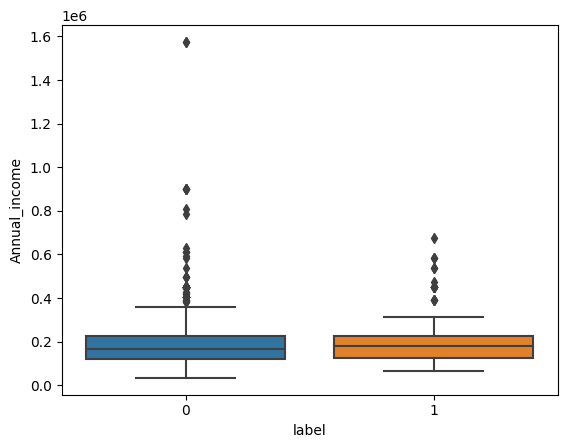

In [ ]:
sns.boxplot(x ='label',y ="Annual_income",data=df)

In [ ]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Age,Employed_experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.541000e+03,1541.000000,1.541000e+03,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,5.078979e+06,0.413368,1.908057e+05,43.974692,6.075276,1.0,0.208306,0.308241,0.092148,2.162232,0.110318
std,4.167137e+04,0.777811,1.121136e+05,11.517294,6.599256,0.0,0.406229,0.461917,0.289329,0.948492,0.313387
min,5.008827e+06,0.000000,3.375000e+04,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045113e+06,0.000000,1.215000e+05,34.000000,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078924e+06,0.000000,1.710000e+05,43.000000,4.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115671e+06,1.000000,2.250000e+05,53.000000,9.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,68.000000,41.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
q1=121500
q3=225000
IQR=q3-q1
IQR

103500

In [ ]:
lower_limit=q1-1.5*IQR
upper_limit=q1+1.5*IQR
print(lower_limit)
print(upper_limit)

-33750.0
276750.0


In [ ]:
df['Annual_income']=df['Annual_income'].clip(lower_limit,upper_limit)

<Axes: xlabel='label', ylabel='Annual_income'>

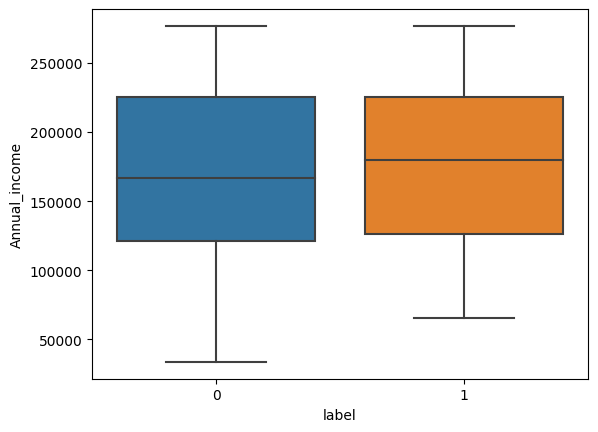

In [ ]:
sns.boxplot(x ='label',y ="Annual_income",data=df)


In [ ]:
import scipy.stats as stats
a = df["Annual_income"]
b = df["label"]

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(a, b)

# Print the results
print("F statistic:", f_statistic)
print("P-value:", p_value)

F statistic: 11148.51185800528
P-value: 0.0


* the p-value should be less then or equal to 0.05.  i.e. p_value<=0.05
* Here p-value is 0 which is less then 0.05
* So they are highly correlated to each other and it is a important factor to predit label which is credit card approval or not.

<Axes: xlabel='label', ylabel='Employed_experience'>

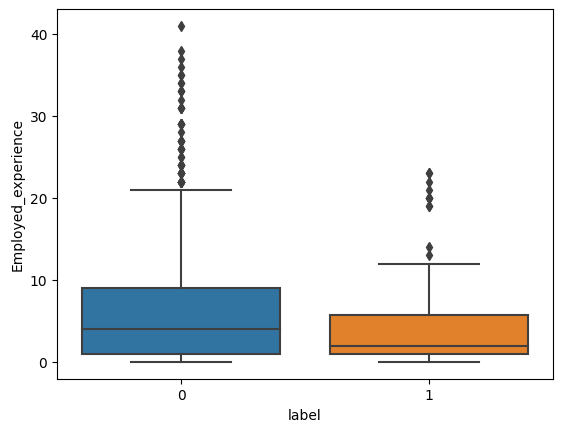

In [ ]:
sns.boxplot(x ='label',y ="Employed_experience",data=df)

In [ ]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Age,Employed_experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.541000e+03,1541.000000,1541.000000,1541.000000,1541.000000,1541.0,1541.000000,1541.000000,1541.000000,1541.000000,1541.000000
mean,5.078979e+06,0.413368,175125.831929,43.974692,6.075276,1.0,0.208306,0.308241,0.092148,2.162232,0.110318
std,4.167137e+04,0.777811,65109.267154,11.517294,6.599256,0.0,0.406229,0.461917,0.289329,0.948492,0.313387
min,5.008827e+06,0.000000,33750.000000,21.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045113e+06,0.000000,121500.000000,34.000000,1.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078924e+06,0.000000,171000.000000,43.000000,4.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115671e+06,1.000000,225000.000000,53.000000,9.000000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,276750.000000,68.000000,41.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


In [ ]:
q1=1
q3=9
IQR=q3-q1
IQR

8

In [ ]:
lower_limit=q1-1.5*IQR
upper_limit=q1+1.5*IQR
print(lower_limit)
print(upper_limit)

-11.0
13.0


In [ ]:
df['Employed_experience']=df['Employed_experience'].clip(lower_limit,upper_limit)

<Axes: xlabel='label', ylabel='Employed_experience'>

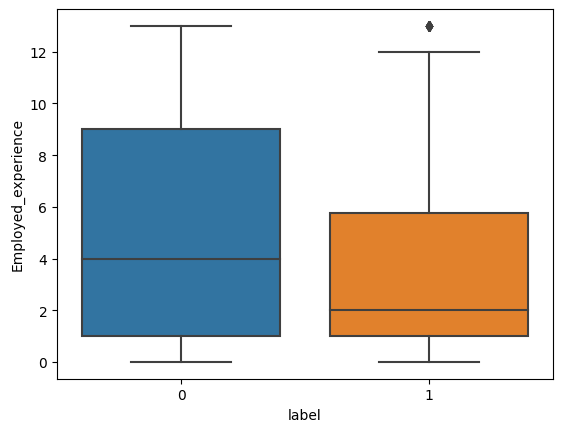

In [ ]:
sns.boxplot(x ='label',y ="Employed_experience",data=df)


In [ ]:
import scipy.stats as stats
a = df["Employed_experience"]
b = df["label"]

# Perform the ANOVA test
f_statistic, p_value = stats.f_oneway(a, b)

# Print the results
print("F statistic:", f_statistic)
print("P-value:", p_value)

F statistic: 1968.0153961440656
P-value: 0.0


* here the p-value is less than 0.05 i.e. p-value=0.0
* so it is highly correlated.
* We can say that Employes_experience is a important factor to predit the label i.e. credit card approval or not.

In [ ]:
df.head()

,Ind_ID,gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_experience,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,1,0,0,0,other,2,1
1,5009744,F,Y,N,0,276750.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
2,5009746,F,Y,N,0,276750.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,1,1,1,0,other,2,1
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1
4,5009752,F,Y,N,0,276750.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,1,1,1,0,other,2,1


In [ ]:
#removing unused columns
df = df.drop(['Ind_ID', 'Mobile_phone','Work_Phone','Phone','EMAIL_ID'], axis=1)

In [ ]:
df.head()

,gender,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,Education,Marital_status,Housing_type,Age,Employed_experience,Type_Occupation,Family_Members,label
0,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,51.0,0.0,other,2,1
1,F,Y,N,0,276750.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,other,2,1
2,F,Y,N,0,276750.00000,Commercial associate,Higher education,Married,House / apartment,44.0,2.0,other,2,1
3,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,other,2,1
4,F,Y,N,0,276750.00000,Commercial associate,Higher education,Married,House / apartment,37.0,2.0,other,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1541 non-null   object 
 1   Car_Owner            1541 non-null   object 
 2   Propert_Owner        1541 non-null   object 
 3   CHILDREN             1541 non-null   int64  
 4   Annual_income        1541 non-null   float64
 5   Type_Income          1541 non-null   object 
 6   Education            1541 non-null   object 
 7   Marital_status       1541 non-null   object 
 8   Housing_type         1541 non-null   object 
 9   Age                  1541 non-null   float64
 10  Employed_experience  1541 non-null   float64
 11  Type_Occupation      1541 non-null   object 
 12  Family_Members       1541 non-null   int64  
 13  label                1541 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 180.6+ KB


## converting non numeric to numeric for train and test data
## Importing Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df:
  if df[col].dtype =='object':
    df[col]=le.fit_transform(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               1541 non-null   int64  
 1   Car_Owner            1541 non-null   int64  
 2   Propert_Owner        1541 non-null   int64  
 3   CHILDREN             1541 non-null   int64  
 4   Annual_income        1541 non-null   float64
 5   Type_Income          1541 non-null   int64  
 6   Education            1541 non-null   int64  
 7   Marital_status       1541 non-null   int64  
 8   Housing_type         1541 non-null   int64  
 9   Age                  1541 non-null   float64
 10  Employed_experience  1541 non-null   float64
 11  Type_Occupation      1541 non-null   int64  
 12  Family_Members       1541 non-null   int64  
 13  label                1541 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 180.6 KB


In [ ]:
X=df[['gender','Car_Owner','Propert_Owner','Annual_income','Type_Income','Education','Housing_type','Age','Employed_experience','Type_Occupation','Family_Members']]
y=df['label']

## Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(1232, 11)

In [ ]:
y_train.shape

(1232,)

In [ ]:
y_test.shape

(309,)

In [ ]:
X_test.shape

(309, 11)

## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X_scale_train=sd.fit_transform(X_train)

In [ ]:
X_scale_test=sd.transform(X_test)

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg=LogisticRegression()

In [ ]:
lreg.fit(X_scale_train,y_train)

LogisticRegression()

In [ ]:
y_pred=lreg.predict(X_scale_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_lr = accuracy_score(y_test, y_pred)
print('The accuracy is :',accuracy_lr)
print(confusion_matrix(y_test,y_pred))


The accuracy is : 0.9061488673139159
[[280   0]
 [ 29   0]]


In [ ]:
# Performing cross validation for increasing the accuracy
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lreg, X,y, cv=10)
print(scores)
print(np.mean(scores))


[0.89032258 0.88961039 0.88961039 0.88961039 0.88961039 0.88961039
 0.88961039 0.88961039 0.88961039 0.88961039]
0.8896816087138667


Here accuracy was high before cross validation so we are going to go with that only.
- The accuracy is 90.6%

## Decision Tree
here we are using non-scaled data because decision tree is a non-parametric model and it does not have any assumptions.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classification = DecisionTreeClassifier()
classification = classification.fit(X_train,y_train)
y_pred = classification.predict(X_test)
print("decision tree training set:",classification.score(X_train, y_train))
print("decision tree testing set:",classification.score(X_test, y_test))
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

decision tree training set: 0.9943181818181818
decision tree testing set: 0.8932038834951457
Accuracy: 0.8932038834951457
[[258  22]
 [ 11  18]]


### Performing Post-Prunning for increasing the accuracy

In [ ]:
classification = DecisionTreeClassifier(max_depth=2)
classification = classification.fit(X_train,y_train)
y_pred = classification.predict(X_test)
print("decision tree training set:",classification.score(X_train, y_train))
print("decision tree testing set:",classification.score(X_test, y_test))
Accuracy_DT=accuracy_score(y_test,y_pred)
print("Accuracy:",Accuracy_DT)
print(confusion_matrix(y_test, y_pred))

decision tree training set: 0.885551948051948
decision tree testing set: 0.9061488673139159
Accuracy: 0.9061488673139159
[[280   0]
 [ 29   0]]


### After performing Post-Prunning the accuracy is increased from 89% to 90%

## Random Forest Classifier
### Here we are performing Pre-Prunning

In [ ]:
#Pre=Prunning
parameter={
          'criterion':['gini', 'entropy', 'log_loss'],
          'max_depth':[1,2,3,4,5],
          'max_features':['sqrt','log2',None],
          }

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
cv=GridSearchCV(rf,param_grid=parameter,cv=5,scoring='accuracy')

In [ ]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['sqrt', 'log2', None]},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'max_features': None}

In [ ]:
y_pred=cv.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_RF=accuracy_score(y_pred,y_test)
print(accuracy_RF)

0.9093851132686084


### By Selecting the best parameters the accuracy is 90.93%

## XGBoost Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
xg=XGBClassifier()
xg=xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9288025889967637
[[274   6]
 [ 16  13]]


### Performing HyperParameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
PARAMETERS = {"subsample":[0.5, 0.75, 1],
              "colsample_bytree":[0.5, 0.75, 1],
              "max_depth":[2, 6, 12],
              "min_child_weight":[1,5,15],
              "learning_rate":[0.3, 0.1, 0.03],
              "n_estimators":[100]
              }

In [ ]:
clf=GridSearchCV(xg,param_grid=PARAMETERS,cv=5,scoring='accuracy')

In [ ]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'learning_rate': [0.3, 0.1, 0.03],
                         'max_depth': [2, 6, 12],
                         'min_child_weight': [1, 5, 15], 'n_estimators': [100],
                         'subsample': [0.5, 0.75, 1]},
             scoring='accuracy')

In [ ]:
clf.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1}

In [ ]:
y_pred=clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_XG=accuracy_score(y_pred,y_test)
print(accuracy_XG)
print(classification_report( y_pred,y_test))

0.9288025889967637
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       294
           1       0.38      0.73      0.50        15

    accuracy                           0.93       309
   macro avg       0.68      0.84      0.73       309
weighted avg       0.96      0.93      0.94       309



After performing hyperparameter tuning the accuracy remains the same .
The acuracy is 92.8%

## Comparing the accuracy of all algorithms

In [ ]:
Models=['Logistic Regression','Decision Tree','Random Forest','XGBoost']
Accuracy=[accuracy_lr,Accuracy_DT,accuracy_RF,accuracy_XG]

In [ ]:
import plotly.express as px

In [ ]:
px.bar(x=Models,y=Accuracy,labels={'x': 'Models', 'y':'Accuracy'})

Hence we got accuracy on different classification

- logisitic regression got accuracy 90.6%

- DecisionTree got accuracy 90.6%

- xg boosting got accuracy 90.93%

- Random Forest got accuracy 92.88%

### Checking the Hypothesis:
* 1)Annual_income and Employed_experience are correlated with label.
* Ans:After looking at the graphs we can say that Annual_income and Employed_experience are correlated with label.
* 2)Random forest tree classifier will perform better than logistic
    classification.
* Ans:As we see above that Accuracy of Logistic refression and Decision tree  
     are same so they performed equally well.
* 3)Random forest Classifier will perform better than XGBoost.
* Ans: As we can see above the accuracy of Random Forest is higher than XGBoost so Random Forest performed well.

## Questions to answer:

1) Why is your proposal important in today’s world? How predicting a good client is worthy for a bank?
- Ans : The proposal to predict credit card approval is highly relevant in today's world due to the increasing use of credit cards. With the rise in e-commerce and online transactions, credit cards have become a primary payment method for many individuals, making it essential for banks to efficiently process credit card applications and improve the approval rate. Predicting a good client is essential for a bank because it helps to minimize the risk of credit default and reduce the cost of managing credit card accounts. Banks can use machine learning algorithms to analyze various factors such as income level, employment status etc. By accurately predicting, banks can offer credit cards to clients with lower risk profiles, which can ultimately lead to better profitability and improved customer satisfaction.

2) How is it going to impact the banking sector?
- Ans: It will going to impact the banking sectore in 3 ways:
 - 1)Improved customer experience: By using predictive models, banks can offer faster and more accurate credit card approvals, which can improve the overall customer experience. This can lead to increased customer satisfaction and loyalty.
 - 2)Reduced risk of credit defaults: Machine learning algorithms can help banks to accurately predict the likelihood of a client defaulting on their credit card payments. By identifying clients with lower credit risk profiles, banks can offer credit cards with lower interest rates, which can reduce the risk of defaults and ultimately improve the bank's profitability.
 - 3)Improved profitability: By reducing the risk of credit defaults and improving the efficiency of the underwriting process, banks can increase their profitability. This can help banks to offer better rates and benefits to their clients, leading to increased market share and revenue.

3) If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.
- Ans: There should be more columns such as payment history, debt on the client to calculate the Credit Score so that we can find whether the client has good credit or bad credit ,the proposed method can be helpful for banks in India by improving the accuracy of credit card approval predictions and improving efficiency.